# MBTI Wordcloud

https://gall.dcinside.com//mgallery/board/lists/?id=enfj

In [5]:
import pandas as pd
import numpy as np
from konlpy.tag import Hannanum, Kkma, Twitter, Komoran, Mecab
import wordcloud
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import Counter

In [36]:
### Hannanum 사용

# Load Dataset

In [6]:
df = pd.read_csv('data/ENFJ.csv')
df.head()

,Unnamed: 0,num,title,content
0,1,5,사랑해요 엔프제,천사가 있다면 당신일 것
1,2,6,ㅎㅇ,너희들 다 내 거임
2,3,7,엔프제 갤러리 특),엔프제는 없고엔프제를 보려는 관객만 있다
3,4,8,갤주는 갤이름 대문자로 바꿔라. ㅈㄴ 불편하네,NaN
4,5,9,ㅎㅇㅎㅇ,엔갤 흥하길 바람


# Remove Empty Spaces

In [7]:
 # 좌우 공백 제거
df['title'] = df['title'].str.strip() 
df['content'] = df['content'].str.strip()
 # 단어 사이의 공백 제거
df['title'].replace('',np.nan, inplace=True) 
df['content'].replace('', np.nan, inplace=True)
df = df.dropna()

df.head()

,Unnamed: 0,num,title,content
0,1,5,사랑해요 엔프제,천사가 있다면 당신일 것
1,2,6,ㅎㅇ,너희들 다 내 거임
2,3,7,엔프제 갤러리 특),엔프제는 없고엔프제를 보려는 관객만 있다
4,5,9,ㅎㅇㅎㅇ,엔갤 흥하길 바람
5,6,12,엔프제 노무 부러워,니네 성격 나줘ㅡㅡ


In [8]:
# CounterVectorizer 를 활용한 빈도 총합 연산
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cvec = CountVectorizer(max_df=0.9, min_df=20, analyzer = 'word', 
                       token_pattern = r'(?u)\b\w+\b' # 1글자 단어도 포함
                      )
X = cvec.fit_transform(df['content'])
X
names = cvec.get_feature_names_out() # 토큰 목록을 배열로 가져옴
x = X.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
names

array(['1', '2', 'enfj', 'enfj가', 'mbti', '가끔', '가장', '같아', '같은', '같이',
       '거', '거의', '것', '계속', '그', '그냥', '그래서', '그런', '그렇게', '그리고', '근데',
       '꼭', '나', '나는', '나도', '나랑', '나를', '나한테', '난', '날', '내', '내가', '너무',
       '다', '다들', '다른', '다시', '더', '되게', '때', '때문에', '또', '라는', '막', '많은',
       '많이', '말', '말을', '먼저', '보고', '보면', '사람', '사람들이', '사람은', '사람을',
       '사람이', '생각', '생각이', '성격', '수', '아', '아니면', '안', '않고', '어떤', '어떻게',
       '엄청', '없는', '엔프제', '엔프제가', '엔프제는', '왜', '원래', '이', '이게', '이런',
       '이렇게', '일단', '있고', '있는', '있는데', '있어', '있으면', '자기', '잘', '정말', '존나',
       '좀', '좋아하는', '좋은', '진짜', '친구', '하고', '하는', '하는데', '하면', '한', '함',
       '항상', '해서', '혼자'], dtype=object)

In [10]:
xsum = np.sum(x, axis=0) # 2차원 배열의 벡터를 세로(0번축)으로 합침
most_n = []
most_v = []
for ind in np.argsort(xsum)[-10:]: # argsort() 값이 작은 순으로 인덱스가 정렬
    most_n.append(names[ind]) # 토큰과 개수를 순서별로 저장
    most_v.append(xsum[ind])
most_n.reverse()
most_v.reverse()
print(most_n)
print(most_v)

['내가', '너무', '잘', '그', '내', '많이', '난', '그냥', '나는', '좀']
[274, 167, 159, 153, 126, 120, 106, 104, 99, 98]


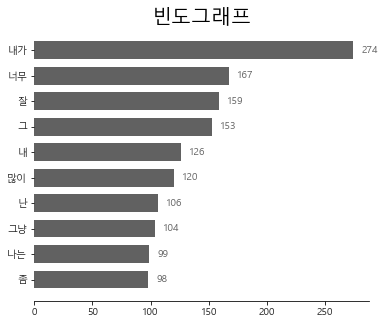

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(6,5))
fcolor = '#212121'
gcolor = '#616161'


ax = plt.subplot()
hbars = ax.barh(most_n, most_v, height=0.7, color=gcolor)
ax.set_title('빈도그래프', fontsize=20)
ax.invert_yaxis() # 축 반대 정렬
ax.tick_params(axis='both', labelsize=10, labelcolor=fcolor) # 눈금 라벨설정
# 테두리 삭제
for i in 'top right left'.split(): 
    ax.spines[i].set_visible(False)
    
ax.bar_label(hbars, fmt='%g', padding=8, color=gcolor, fontsize=10) # 그래프에 값 라벨 표현
plt.show()

# Extract Nouns

In [39]:
extractor = Hannanum() # 명사만 추출하는 엔진

nouns = []

for i, row in tqdm(df.iterrows()):
    _, num, title, content = row

    if title and type(title) is str:
        nouns.extend(extractor.nouns(title))
    if content and type(content) is str:
        nouns.extend(extractor.nouns(content))

703it [00:15, 46.63it/s]


# Count Same Words

In [51]:
count = Counter(nouns)
words = dict(count.most_common())  # 중복된 단어를 중복된 개수를 내림차순으로 정렬한다.
print(words)

{'나': 758, '사람': 447, '것': 409, '엔프제': 312, '생각': 229, '말': 181, '때': 165, '수': 154, '내': 144, '친구': 129, '진짜': 106, '성격': 102, '데': 97, '일': 89, '뭐': 80, '근데': 79, '너': 75, '사람들': 75, '얘': 73, '친구들': 72, '마음': 70, '여자': 69, '사랑': 66, '글': 64, '이': 59, '자기': 52, '지': 51, '적': 50, '이야기': 49, '대화': 47, '엔프제들': 47, '상처': 47, '유형': 46, '주변': 46, '라': 46, '애': 44, '기분': 44, '관계': 44, '우리': 44, '들': 43, '중': 42, '편': 41, '남': 41, '남자': 41, '거': 40, '상대': 36, '등': 36, '그': 35, '오늘': 35, '하나': 35, '한번': 35, '듯': 35, '행복': 35, '자신': 34, '행동': 34, '연애': 34, '검사': 33, '본인': 33, '이해': 32, '갤러리': 31, '저': 30, '뭔가': 30, '존': 30, '다들': 30, '감정': 30, '누구': 30, '전': 29, '인간관계': 29, '연락': 29, '이거': 29, '정도': 29, '때문': 29, '상황': 29, '속': 28, '상대방': 28, '줄': 28, '특징': 27, '여기': 27, '공부': 27, '성향': 27, '이상': 26, '고민': 26, '눈': 26, '시간': 25, '앞': 25, '비슷': 24, '칭찬': 24, '이유': 24, '예전': 24, '집': 23, '진심': 22, '얘기': 22, '평소': 22, '세상': 22, '부분': 21, '인생': 21, '관심': 21, '서로': 21, '갤': 20, 'ㅋㅋㅋㅋㅋ': 20, 'ㅋㅋ': 20

# Remove Minority
- Remove the word length is 1
- Remove the word frequency is 1

In [52]:
for word in list(words.keys()):
    if len(word) == 1 :
        del words[word]
        continue
        
    if words[word] == 1:
        del words[word]

print(words)

{'사람': 447, '엔프제': 312, '생각': 229, '친구': 129, '진짜': 106, '성격': 102, '근데': 79, '사람들': 75, '친구들': 72, '마음': 70, '여자': 69, '사랑': 66, '자기': 52, '이야기': 49, '대화': 47, '엔프제들': 47, '상처': 47, '유형': 46, '주변': 46, '기분': 44, '관계': 44, '우리': 44, '남자': 41, '상대': 36, '오늘': 35, '하나': 35, '한번': 35, '행복': 35, '자신': 34, '행동': 34, '연애': 34, '검사': 33, '본인': 33, '이해': 32, '갤러리': 31, '뭔가': 30, '다들': 30, '감정': 30, '누구': 30, '인간관계': 29, '연락': 29, '이거': 29, '정도': 29, '때문': 29, '상황': 29, '상대방': 28, '특징': 27, '여기': 27, '공부': 27, '성향': 27, '이상': 26, '고민': 26, '시간': 25, '비슷': 24, '칭찬': 24, '이유': 24, '예전': 24, '진심': 22, '얘기': 22, '평소': 22, '세상': 22, '부분': 21, '인생': 21, '관심': 21, '서로': 21, 'ㅋㅋㅋㅋㅋ': 20, 'ㅋㅋ': 20, '너희': 20, '모습': 19, '호감': 19, '공감': 19, '지금': 19, '계획': 19, '분위기': 19, '사이': 19, '인프피': 18, '문제': 18, '선물': 18, '그때': 18, '마스크': 18, '인간': 17, '궁합': 17, '노력': 17, '인팁': 17, '질문': 17, '그것': 17, 'ㅋㅋㅋ': 17, '엄마': 17, '그녀': 17, '인프제': 16, '필요': 16, '소리': 16, '1.': 16, '술자리': 16, 'ㅠㅠ': 15, '미안': 15, '우울': 15, '완전'

In [42]:
wordcloud.__version__

'1.8.2.2'

In [43]:
# words = {
#     '나' : 10,
#     '사람' : 5
# }

In [53]:
wc = wordcloud.WordCloud()
wc

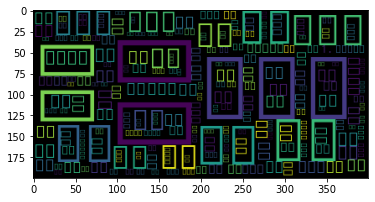

In [54]:
cloud = wc.generate_from_frequencies(words)
plt.imshow(cloud)
plt.show()

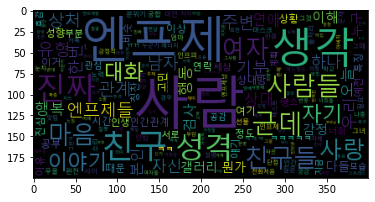

In [55]:
wc = wordcloud.WordCloud(font_path='C:/Windows/Fonts/malgun.ttf')

cloud = wc.generate_from_frequencies(words)
plt.imshow(cloud)
plt.show()

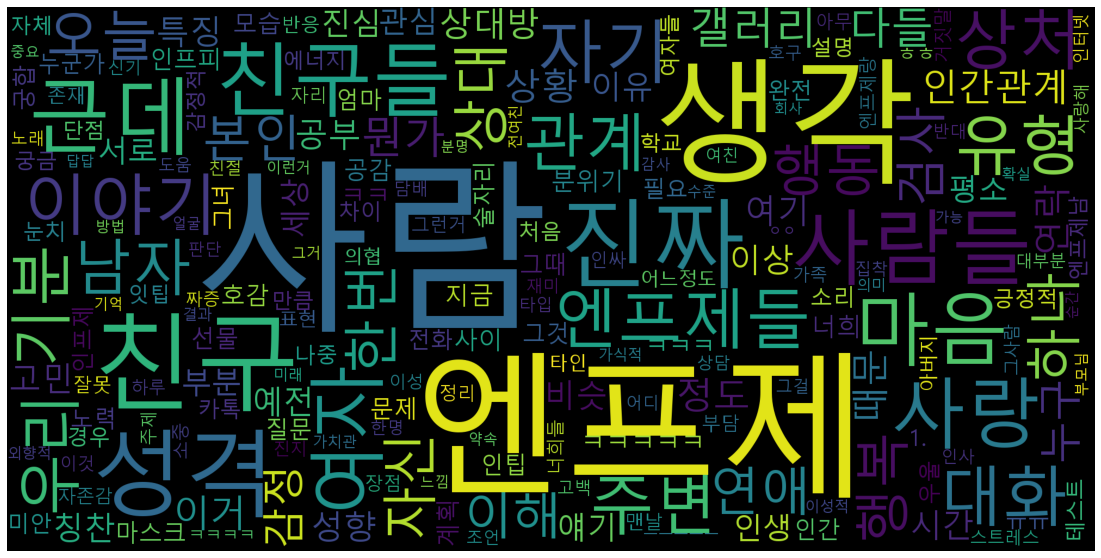

In [56]:
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()